In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, 
                             cohen_kappa_score, recall_score, precision_score, f1_score)
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
fruits = pd.read_csv("E:/Python Programs/fruits.csv")
fruits.head()

,color,sphericity,weight,label
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange


In [3]:
X = fruits[["sphericity", "weight"]]
y = fruits['label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)
X_train.shape, y_test.shape

((45, 2), (15,))

In [5]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8

In [6]:
y_predict1 = model.predict(X_test)
y_predict1

array(['Apple', 'Orange', 'Apple', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange', 'Apple', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [7]:
prob = model.predict_proba(X_test)
prob

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ]])

In [8]:
y_predict2 = np.array(["Apple" if p>=0.5 else "Orange" for p in prob[:,0]])
y_predict2

array(['Apple', 'Orange', 'Apple', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange', 'Apple', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype='<U6')

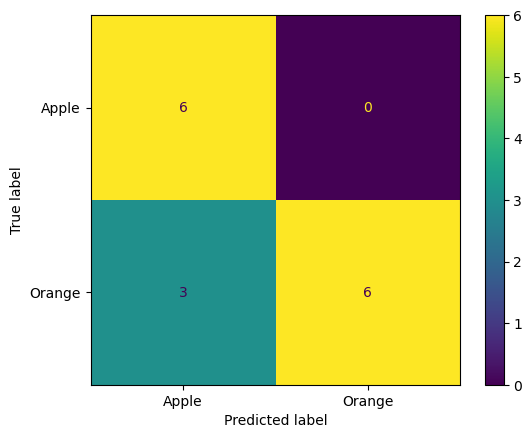

In [9]:
# Actual Predicted Samples

ConfusionMatrixDisplay.from_predictions(y_test, y_predict1)
plt.show()

In [10]:
print("accuracy score: ", accuracy_score(y_test, y_predict2))
print("balanced accuracy score: ", balanced_accuracy_score(y_test, y_predict2))
print("kappa score: ", cohen_kappa_score(y_test, y_predict2))
print("precision: ", precision_score(y_test, y_predict2, pos_label="Apple"))
print("recall: ", recall_score(y_test, y_predict2, pos_label="Apple"))
print("f1 score: ", f1_score(y_test, y_predict2, pos_label="Apple"))

accuracy score:  0.8
balanced accuracy score:  0.8333333333333333
kappa score:  0.6153846153846154
precision:  0.6666666666666666
recall:  1.0
f1 score:  0.8


In [11]:
y_predict3 = np.array(["Apple" if p>1 else "Orange" for p in prob[:,0]])
y_predict3

array(['Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange',
       'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange',
       'Orange', 'Orange', 'Orange'], dtype='<U6')

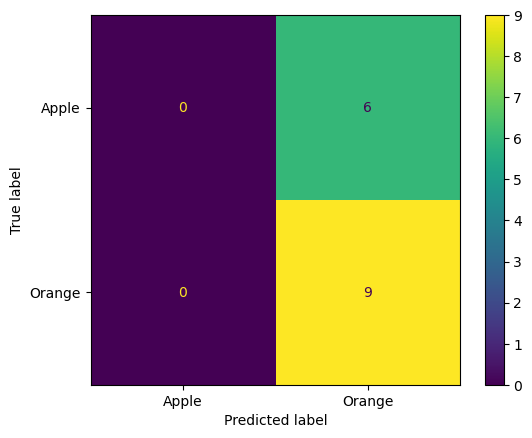

In [12]:
# All fruits are predicted as Oranges

ConfusionMatrixDisplay.from_predictions(y_test,y_predict3)
plt.show()

In [13]:
print("accuracy score: ", accuracy_score(y_test, y_predict3))
print("balanced accuracy score: ", balanced_accuracy_score(y_test, y_predict3))
print("kappa score: ", cohen_kappa_score(y_test, y_predict3))
print("precision: ", precision_score(y_test, y_predict3, pos_label="Apple"))
print("recall: ", recall_score(y_test, y_predict3, pos_label="Apple"))
print("f1 score: ", f1_score(y_test, y_predict3, pos_label="Apple"))

accuracy score:  0.6
balanced accuracy score:  0.5
kappa score:  0.0
precision:  0.0
recall:  0.0
f1 score:  0.0


In [14]:
y_predict4 = np.array(["Apple" if p>=0 else "Orange" for p in prob[:,0]])
y_predict4

array(['Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple',
       'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple',
       'Apple'], dtype='<U5')

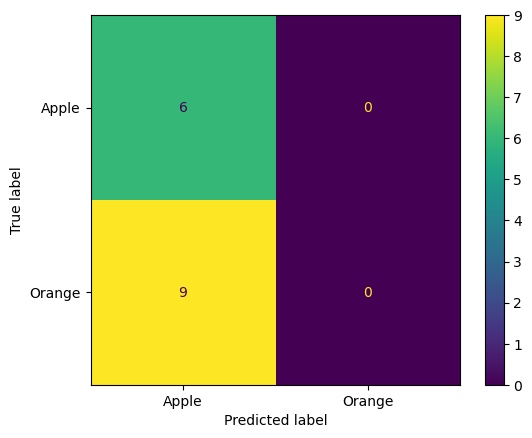

In [15]:
# All fruits are predicted as Apples

ConfusionMatrixDisplay.from_predictions(y_test,y_predict4)
plt.show()

In [16]:
print("accuracy score: ", accuracy_score(y_test, y_predict4))
print("balanced accuracy score: ", balanced_accuracy_score(y_test, y_predict4))
print("kappa score: ", cohen_kappa_score(y_test, y_predict4))
print("precision: ", precision_score(y_test, y_predict4, pos_label="Apple"))
print("recall: ", recall_score(y_test, y_predict4, pos_label="Apple"))
print("f1 score: ", f1_score(y_test, y_predict4, pos_label="Apple"))

accuracy score:  0.4
balanced accuracy score:  0.5
kappa score:  0.0
precision:  0.4
recall:  1.0
f1 score:  0.5714285714285715


In [17]:
prob

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ]])

In [18]:
results = pd.DataFrame({"actual label": y_test, "predicted label": model.predict(X_test),
                       "prob apple": prob[:,0], "prob orange": prob[:,1]})
results

,actual label,predicted label,prob apple,prob orange
31,Apple,Apple,1.0,0.0
3,Orange,Orange,0.0,1.0
38,Apple,Apple,1.0,0.0
27,Orange,Apple,0.6,0.4
21,Orange,Apple,0.8,0.2
17,Orange,Orange,0.0,1.0
46,Apple,Apple,1.0,0.0
2,Orange,Orange,0.0,1.0
23,Orange,Apple,0.8,0.2
26,Orange,Orange,0.0,1.0


In [19]:
results[results["actual label"] != results["predicted label"]]

,actual label,predicted label,prob apple,prob orange
27,Orange,Apple,0.6,0.4
21,Orange,Apple,0.8,0.2
23,Orange,Apple,0.8,0.2


In [20]:
y_predict5 = np.array(["Apple" if p>0.8 else "Orange" for p in prob[:,0]])
y_predict5

array(['Apple', 'Orange', 'Apple', 'Orange', 'Orange', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype='<U6')

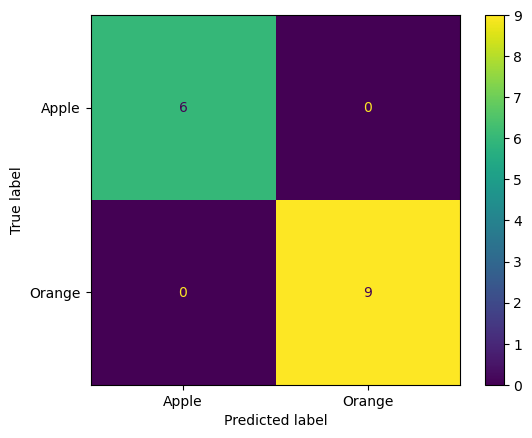

In [21]:
# Apples predicted as Apples and Oranges predicted as Oranges after tuning our results

ConfusionMatrixDisplay.from_predictions(y_test,y_predict5)
plt.show()

In [22]:
print("accuracy score: ", accuracy_score(y_test, y_predict5))
print("balanced accuracy score: ", balanced_accuracy_score(y_test, y_predict5))
print("kappa score: ", cohen_kappa_score(y_test, y_predict5))
print("precision: ", precision_score(y_test, y_predict5, pos_label="Apple"))
print("recall: ", recall_score(y_test, y_predict5, pos_label="Apple"))
print("f1 score: ", f1_score(y_test, y_predict5, pos_label="Apple"))

accuracy score:  1.0
balanced accuracy score:  1.0
kappa score:  1.0
precision:  1.0
recall:  1.0
f1 score:  1.0


In [23]:
y_predict6 = np.array(["Apple" if p<=0.8 else "Orange" for p in prob[:,0]])
y_predict6

array(['Orange', 'Apple', 'Orange', 'Apple', 'Apple', 'Apple', 'Orange',
       'Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange',
       'Apple'], dtype='<U6')

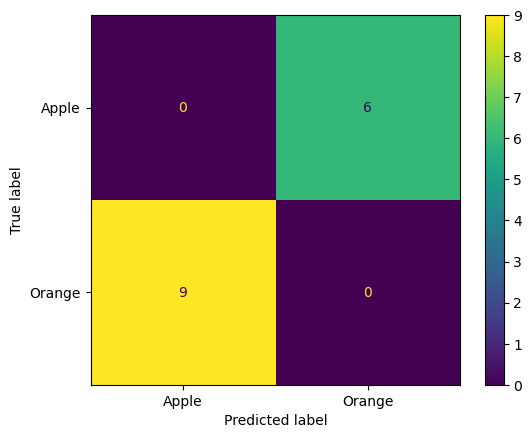

In [24]:
# Apples predicted as Oranges and Oranges predicted as Apples

ConfusionMatrixDisplay.from_predictions(y_test,y_predict6)
plt.show()

In [25]:
print("accuracy score: ", accuracy_score(y_test, y_predict6))
print("balanced accuracy score: ", balanced_accuracy_score(y_test, y_predict6))
print("kappa score: ", cohen_kappa_score(y_test, y_predict6))
print("precision: ", precision_score(y_test, y_predict6, pos_label="Apple"))
print("recall: ", recall_score(y_test, y_predict6, pos_label="Apple"))
print("f1 score: ", f1_score(y_test, y_predict6, pos_label="Apple"))

accuracy score:  0.0
balanced accuracy score:  0.0
kappa score:  -0.9230769230769229
precision:  0.0
recall:  0.0
f1 score:  0.0
